### An implementation of a simple neural network

#### Data Loading and Network Setup

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from data_loader import MnistDataloader
from IPython.display import display, clear_output

print("Loading dataset...")
mnist_dataloader = MnistDataloader("dataset/MNIST/raw")
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train_images = np.array(x_train)[:6000] # 60000 x 28 x 28
y_train = np.array(y_train)[:6000] # 60000
x_test_images = np.array(x_test)[:1000]   # 10000 x 28 x 28
y_test = np.array(y_test)[:1000]   # 10000

# Convert tensor to lower dimension and normalize
print("Reshaping dataset...")
x_train = x_train_images.reshape(x_train_images.shape[0], -1) # 60000 x 784
x_train = x_train / 255.0
x_test = x_test_images.reshape(x_test_images.shape[0], -1)    # 10000 x 784
x_test = x_test / 255.0

# Apply one-hot-coding to labels
y_train_hot = np.zeros((y_train.size, 10))
y_train_hot[np.arange(y_train.size), y_train] = 1   # 60000 x 10
y_test_hot = np.zeros((y_test.size, 10))
y_test_hot[np.arange(y_test.size), y_test] = 1      # 10000 x 10

# Construct network
print("Creating network...")
layer_1 = 128
layer_2 = 10
weights_1 = np.random.randn(x_train.shape[1], layer_1) * 0.01  # 784 x 128
biases_1 = np.zeros(layer_1)                                   # 128
weights_2 = np.random.randn(layer_1, layer_2) * 0.01           # 128 x 10
biases_2 = np.zeros(layer_2)                                   # 10
print("Done")

# ReLU activation function
def relu(vector):
    return np.maximum(0, vector)


# Derivative function of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)


# Softmax activation function
def softmax(vector):
    exp_vector = np.exp(vector)
    return exp_vector / np.sum(exp_vector)


# Cross entropy loss function
def ce_loss(output_vector, label_vector):
    return -np.sum(label_vector * np.log(output_vector))

Loading dataset...
Reshaping dataset...
Creating network...
Done


#### Network Training

'Training 5000 of 6000 done.'

[np.float64(0.6319200525486823), np.float64(0.0003832885929869361), np.float64(0.14204405154002986), np.float64(0.008801891133667332), np.float64(0.2278780594061264), np.float64(0.119595000683262), np.float64(0.009563955898746783), np.float64(0.02996572282277578), np.float64(0.018069167388065178), np.float64(0.011333559035327461), np.float64(0.0028159928700688197), np.float64(0.5123585433758026), np.float64(0.0008427895919649679), np.float64(0.010257815198607835), np.float64(0.016453893744513642), np.float64(0.024937851919695414), np.float64(0.09912630974787513), np.float64(0.11384676711621473), np.float64(0.20946068240652915), np.float64(0.8045958659116529), np.float64(0.03774716904568419), np.float64(0.0015264422658001371), np.float64(0.7880221536927173), np.float64(0.00921516439747597), np.float64(1.2785634697913115), np.float64(0.23215955705554364), np.float64(0.25653045958061044), np.float64(7.410482510744757e-05), np.float64(2.9864042649774074), np.float64(1.0176859843807755), np

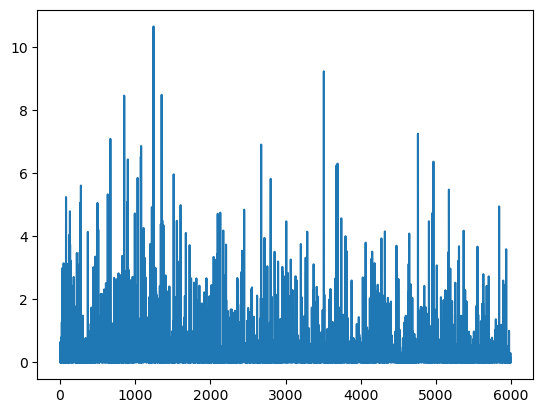

In [7]:
# Run network
learning_rate = 0.01
for index in range(x_train.shape[0]):
    if index != 0 and index % 1000 == 0:
        clear_output(wait=True)
        display(f"Training {index} of {x_train.shape[0]} done.")

    # Forward pass
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)

    # Backward pass
    d_output_2 = output_2 - y_train_hot[index]  # Combined derivative of softmax and ce loss
    d_loss_weights_2 = np.outer(output_1, d_output_2)
    d_output_1 = np.dot(weights_2, d_output_2) * relu_derivative(output_1)
    d_loss_weights_1 = np.outer(x_train[index], d_output_1)

    weights_2 -= learning_rate * d_loss_weights_2
    biases_2 -= learning_rate * d_output_2
    weights_1 -= learning_rate * d_loss_weights_1
    biases_1 -= learning_rate * d_output_1

# Calculate losses
losses = []
for index in range(x_train.shape[0]):
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    losses.append(ce_loss(output_2, y_train_hot[index]))

print(losses)
print(np.mean(losses))
plt.plot(losses)
print("Done")

In [ ]:
import pickle
pickle.dump([
    weights_1,
    biases_1,
    weights_2,
    biases_2
], open("tmp.pickle", "wb"))

#### Test Network

[np.float64(0.004044699272133599), np.float64(0.18584447341712843), np.float64(0.019453738191998592), np.float64(0.0006787492550086382), np.float64(0.2100621769335712), np.float64(0.006611918795849747), np.float64(0.10145732124694459), np.float64(0.11590617512903875), np.float64(5.371401376052565), np.float64(0.20753637069705944), np.float64(0.021877185342511603), np.float64(0.8962873334079472), np.float64(0.15952774327906377), np.float64(0.005481577637743552), np.float64(0.005536463676920628), np.float64(0.6653815780853182), np.float64(0.16542219027358618), np.float64(0.005592515056359164), np.float64(0.6905047437718373), np.float64(0.02961085624920418), np.float64(0.806429130978627), np.float64(0.06790701336545865), np.float64(0.4600206348615812), np.float64(0.08358751973646224), np.float64(0.32016417971295164), np.float64(0.0018270404028476032), np.float64(0.02702024502497573), np.float64(0.04327354843074059), np.float64(0.0034200729878034316), np.float64(0.04807279266875875), np.fl

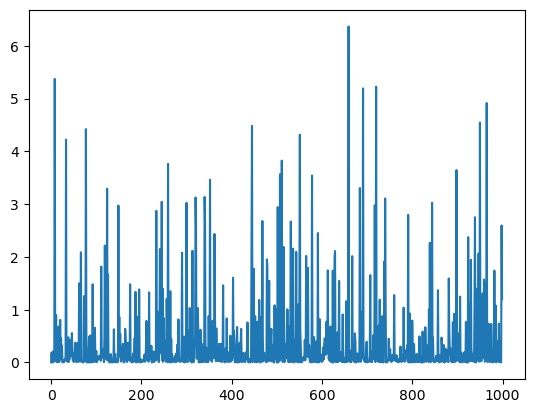

In [8]:
test_outputs = []
test_losses = []
for index in range(x_test.shape[0]):
    output_1 = relu(np.dot(x_test[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    loss = ce_loss(output_2, y_test_hot[index])
    test_outputs.append(output_2)
    test_losses.append(loss)

print(test_losses)
print(np.mean(test_losses))
plt.plot(test_losses)

Visualize Network

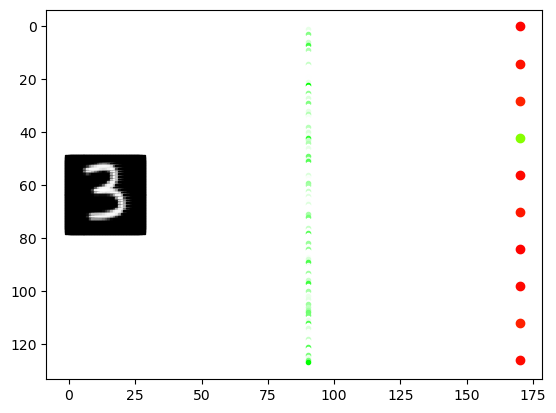

0.0


In [141]:
import math
import matplotlib.pyplot as plt

sample = 1
# data = x_test[sample]
data = plt.imread("dataset/test2.png")[..., 0].flatten()
pixel_count = len(data)
image_size = math.sqrt(pixel_count)

output_1 = relu(np.dot(data, weights_1) + biases_1)
output_1_norm = (output_1 - output_1.min()) / (output_1.max() - output_1.min())
output_2 = softmax(np.dot(output_1_norm, weights_2) + biases_2)

for index, value in enumerate(data):
    x = index % image_size
    y = index // image_size
    color = (value, value, value)
    plt.plot(x, y+50, 's', color=color)
    # plt.plot([x, 90], [y+50, index], color=color)

for index, value in enumerate(output_1_norm):
    # color = (min(1, 1 - value), min(1, 1 + value), 0) # weights
    # color = (min(0.5, 1 - value) * 2, min(0.5, value) * 2, 0)
    color = (1-value, 1, 1-value)
    plt.plot(90, index, '.', color=color)

for index, value in enumerate(output_2):
    color = (min(0.5, 1 - value) * 2, min(0.5, value) * 2, 0)
    plt.plot(170, index*14, 'o', color=color)

plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()
print(x_train[0].min())

Index of max value: 659
Accuracy: 88.7 %
Label:  7 - Prediction: 7 -> True


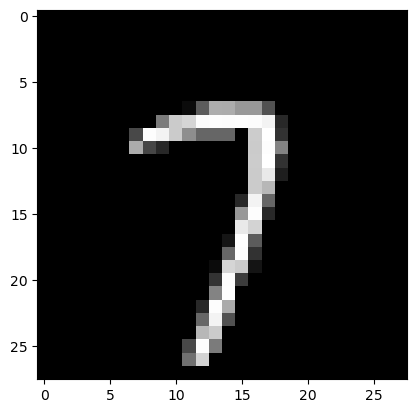

<BarContainer object of 10 artists>

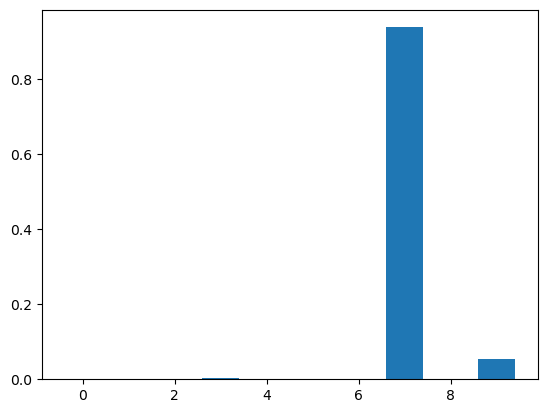

In [9]:
# Print max value index
max_index = test_losses.index(max(test_losses))
print("Index of max value:", max_index)

# Print accuracy
hits = [np.argmax(test_outputs[index]) == y_test[index] for index in range(len(x_test))]
print("Accuracy:", sum(hits) / len(hits) * 100, "%")

# Plotting the bar chart
index = 229
print("Label: ", y_test[index], "- Prediction:", np.argmax(test_outputs[index]), "->", hits[index])
plt.imshow(x_test_images[index], cmap=plt.cm.gray)
plt.show()
plt.bar(range(len(test_outputs[index])), test_outputs[index])
